### Data Collection and Pre-processing
---

* Use Yahoo Bitcoin History
* Use USD Index Futures Historical Data
* Price History from 2015 to present

#### Look at video here for TS analysis - 
https://www.youtube.com/watch?v=_vQ0W_qXMxk&t=1157s&ab_channel=PyData 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

%matplotlib inline


In [2]:
# Read BTC and USD Futures Index data into dataframes
# Download BTC data using yfinance
bc = yf.download('BTC-USD', start='2014-01-01')
usd = yf.download('DX-Y.NYB', start='2014-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
bc = bc[['Close', 'Volume']]
bc = bc.rename(columns={'Close':'BTC_Price'})
bc.head()

,BTC_Price,Volume
Date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100


In [4]:
usd = usd[['Close']]
usd = usd.rename(columns={'Close':'USD_Price'})
usd.head()

,USD_Price
Date,
2013-12-31,80.040001
2014-01-02,80.629997
2014-01-03,80.790001
2014-01-06,80.650002
2014-01-07,80.830002


In [5]:
bc.describe()

,BTC_Price,Volume
count,2789.000000,2.789000e+03
mean,12134.039165,1.506095e+10
std,16617.071998,1.989277e+10
min,178.102997,5.914570e+06
25%,613.982971,8.319360e+07
50%,6467.069824,5.409248e+09
75%,11064.458008,2.559527e+10
max,67566.828125,3.509679e+11


In [6]:
usd.describe()

,USD_Price
count,2102.000000
mean,94.119729
std,5.235570
min,79.139999
25%,92.449997
50%,95.334999
75%,97.419998
max,103.750000


In [7]:
print(bc.shape[0])
print(usd.shape[0])

2789
2102


In [16]:
# Merge the two dataframes by date
join = bc.merge(usd, left_index=True, right_index=True, how="left")
# Drop Nas
join.dropna(inplace=True)
join.head()

,BTC_Price,Volume,USD_Price
Date,,,
2014-09-17,457.334015,21056800,84.699997
2014-09-18,424.440002,34483200,84.320000
2014-09-19,394.795990,37919700,84.800003
2014-09-22,402.152008,24127600,84.669998
2014-09-23,435.790985,45099500,84.660004


In [17]:
# Merge the two dataframes by date
# Don't need this loop

# join = bc.copy()

# for date1 in join.index.values:
#     for date2 in usd.index.values:
#         if date1 == date2:
#             itemindex = np.where(usd.index == date2)[0][0]
#             val = usd.at[date2, "USD_Price"]
#             join.at[date1, "USD_Price"] = val

# join.head()

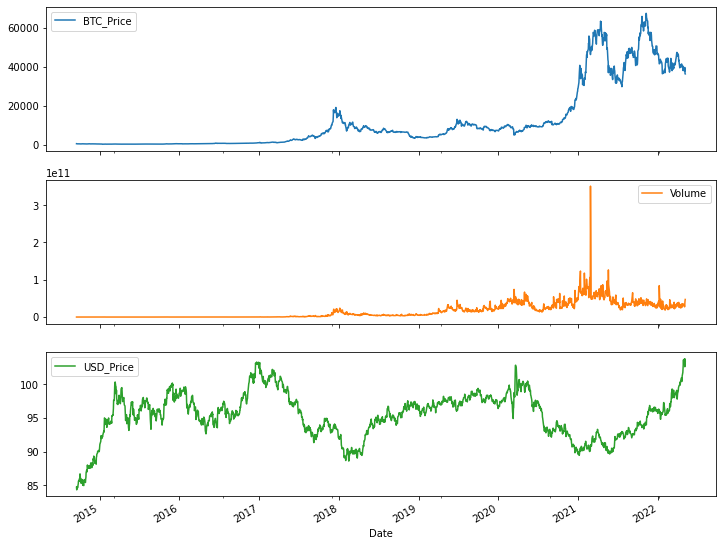

In [19]:
join.plot(subplots=True, figsize=(12,10))
plt.show()

### Deeper Dive into Bitcoin and USD price movements
---

In [49]:
def plotcharts(y, title, lags=None, figsize=(16, 10)):
    fig = plt.figure()
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, hist_ax, acf_ax, pacf_ax

In [31]:
series = join.copy()
series.iloc[1,:]

BTC_Price    4.244400e+02
Volume       3.448320e+07
USD_Price    8.432000e+01
Name: 2014-09-18 00:00:00, dtype: float64

/Users/hyperion/opt/miniconda3/envs/quantcrypto/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/hyperion/opt/miniconda3/envs/quantcrypto/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/hyperion/opt/miniconda3/envs/quantcrypto/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method

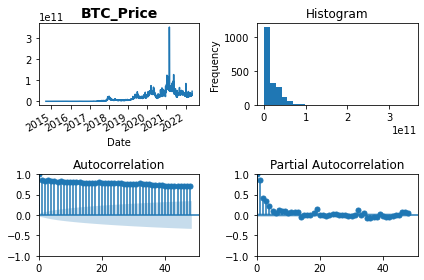

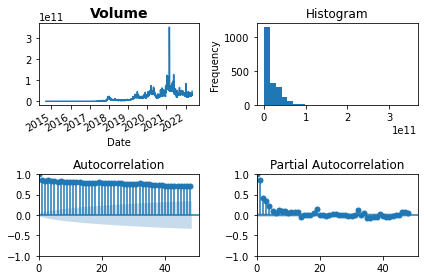

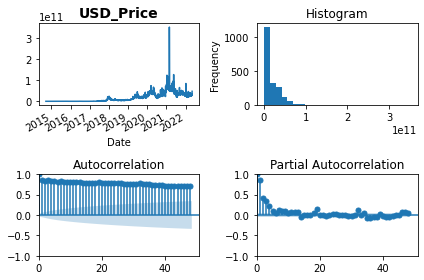

In [50]:
num_var = len(series.iloc[1,:])
for i in range(num_var):
    plotcharts(series.iloc[:,1].dropna(), title=series.columns[i], lags=48)

#### Normalization
--- 
Above time series are not stationary. Let's normalize and fix that

In [33]:
series

,BTC_Price,Volume,USD_Price
Date,,,
2014-09-17,457.334015,21056800,84.699997
2014-09-18,424.440002,34483200,84.320000
2014-09-19,394.795990,37919700,84.800003
2014-09-22,402.152008,24127600,84.669998
2014-09-23,435.790985,45099500,84.660004
...,...,...,...
2022-05-02,38529.328125,32922642426,103.739998
2022-05-03,37750.453125,27326943244,103.470001
2022-05-04,39698.371094,36754404490,102.589996


In [51]:
# Log transformation - converting data to a logarithmic scale
log = pd.DataFrame(np.log(series))
log

,BTC_Price,Volume,USD_Price
Date,,,
2014-09-17,6.125414,16.862734,4.439116
2014-09-18,6.050771,17.355983,4.434619
2014-09-19,5.978369,17.450981,4.440296
2014-09-22,5.996830,16.998867,4.438761
2014-09-23,6.077163,17.624382,4.438643
...,...,...,...
2022-05-02,10.559175,24.217426,4.641888
2022-05-03,10.538753,24.031139,4.639282
2022-05-04,10.589065,24.327524,4.630740


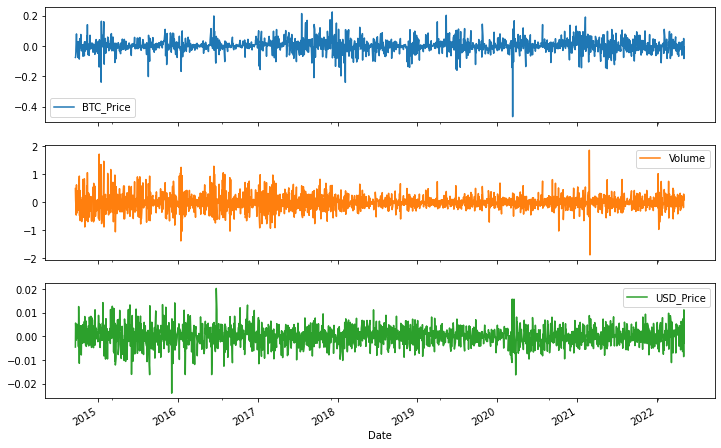

In [52]:
# Differencing log values
#1
log_diff = log.diff().dropna()
# 2
log_diff2 = log_diff.diff().dropna()
log_diff.plot(subplots=True, figsize=(12, 8))
plt.show()

In [53]:
# normalization

# import minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# create minmaxscaler object
norm = MinMaxScaler()

# applying norm to dataframe
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm


,BTC_Price,Volume,USD_Price
0,0.565467,0.633542,0.439903
1,0.568717,0.526946,0.669500
2,0.700430,0.380507,0.506759
3,0.790119,0.668944,0.538722
4,0.631187,0.397944,0.645116
...,...,...,...
1917,0.670644,0.518637,0.711721
1918,0.644065,0.451658,0.482570
1919,0.746602,0.580849,0.348615
1920,0.554888,0.544187,0.795149


/Users/hyperion/opt/miniconda3/envs/quantcrypto/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/hyperion/opt/miniconda3/envs/quantcrypto/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/hyperion/opt/miniconda3/envs/quantcrypto/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method

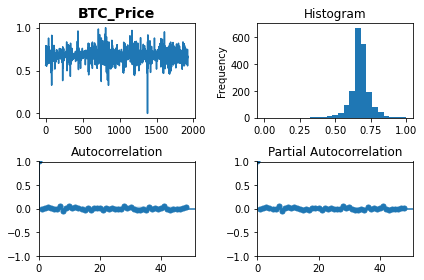

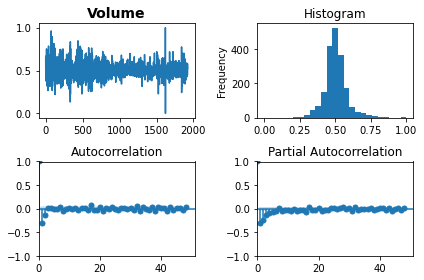

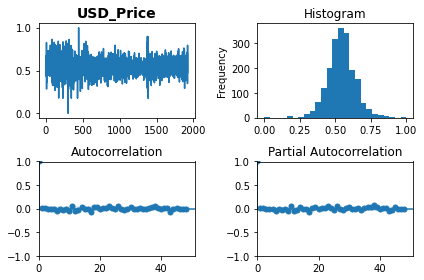

In [54]:
# Now plot the series, hist, acf and pacf again
num_var = len(join_norm.iloc[1,:])
for i in range(num_var):
    plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

#### Check TS Stationarity
---

In [55]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag="AIC")
    print("1. ADF : ", dftest[0])
    print("2. p-value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations used for ADF regression and critical value calc: ", dftest[3])
    print("5. Critical values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

ad_test(log_diff["BTC_Price"])
print("----------------------------------------------------")
ad_test(log_diff["Volume"])
print("----------------------------------------------------")
ad_test(log_diff["USD_Price"])
print("----------------------------------------------------")

1. ADF :  -12.879336966162068
2. p-value :  4.6950936548800825e-24
3. Num of Lags :  9
4. Num of Observations used for ADF regression and critical value calc:  1912
5. Critical values : 
	 1% :  -3.433774739025614
	 5% :  -2.8630528270856557
	 10% :  -2.567575370890303
----------------------------------------------------
1. ADF :  -12.547085810242141
2. p-value :  2.2479845875167828e-23
3. Num of Lags :  20
4. Num of Observations used for ADF regression and critical value calc:  1901
5. Critical values : 
	 1% :  -3.433794582887893
	 5% :  -2.8630615877583185
	 10% :  -2.567580035583033
----------------------------------------------------
1. ADF :  -7.780946744128818
2. p-value :  8.420687604659959e-12
3. Num of Lags :  25
4. Num of Observations used for ADF regression and critical value calc:  1896
5. Critical values : 
	 1% :  -3.4338036790464495
	 5% :  -2.8630656035129878
	 10% :  -2.5675821738080615
----------------------------------------------------


### Model 1: Vector Autoregressive (AR) Model
---

In [56]:
# Split the dataset into train and test datasets
n_obs = 7
train, test = log_diff[:-n_obs], log_diff[-n_obs:]
log_diff.head()

,BTC_Price,Volume,USD_Price
Date,,,
2014-09-18,-0.074643,0.493249,-0.004496
2014-09-19,-0.072402,0.094999,0.005676
2014-09-22,0.018461,-0.452114,-0.001534
2014-09-23,0.080333,0.625515,-0.000118
2014-09-24,-0.029306,-0.386966,0.004596


In [59]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags=22, ic='aic')
results.summary()

/Users/hyperion/opt/miniconda3/envs/quantcrypto/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, May, 2022
Time:                     00:52:32
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -19.5247
Nobs:                     1916.00    HQIC:                  -19.6292
Log likelihood:           10764.0    FPE:                2.81022e-09
AIC:                     -19.6900    Det(Omega_mle):     2.72825e-09
--------------------------------------------------------------------
Results for equation BTC_Price
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.002100         0.001061            1.980           0.048
L1.BTC_Price        -0.015272         0.023029           -0.663           0.507
L1.Volume            0.009301         0.003915            2.

In [64]:
results.k_ar

6

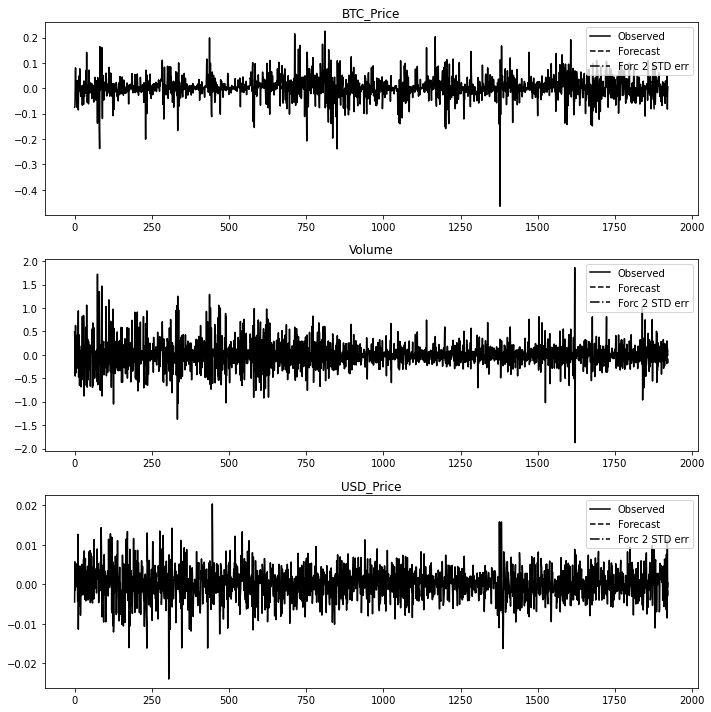

In [60]:
lag_order = results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast = pd.DataFrame(predicted, index = log_diff.index[-n_obs:], columns = log_diff.columns)


# Plotting the Forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()

In [63]:
# Inverting the Differencing Transformation
def invert_transformation(df, df_forecast, second_diff):
    for col in df.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (df[col].iloc[-1] - df[col].iloc[-2]) + df_forecast[str(col)].cumsum()
        # Undo the 1st Differencing
        df_forecast[str(col)] = df[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(train, forecast, second_diff=False)
forecast_values.tail()

,BTC_Price,Volume,USD_Price
Date,,,
2022-05-02,0.334144,-2.234939,0.069227
2022-05-03,0.508621,-3.574359,0.106723
2022-05-04,0.722144,-5.224424,0.152517
2022-05-05,0.978205,-7.164794,0.206822
2022-05-06,1.279191,-9.379372,0.269560


In [ ]:
\